In [1]:
import knee_point as knp
import numpy as np
import math

import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

import points_distance as pd

In [2]:
# points = knp.getKneePoints(frames)
# center_points = knp.getCenterKneePoint(points)
center_point = 4605

In [3]:
# params neighbor:
# 1.center point
# 2.radius(0..0.5 is reasonable)
# 3. curve type(default is guass, from{gauss,mean,rms,abs})
# 4. pose number(default is 1, from 1..8)

In [4]:
result_gauss_average = []
result_mean_average = []
result_abs_average = []
result_rms_average = []
for  i in range(1,9):
    result_gauss_average.append(np.average([x[1] for x in knp.getNeighborPoints(center_point,0.25,'ng',str(i))]))
    result_mean_average.append(np.average([x[1] for x in knp.getNeighborPoints(center_point,0.25,'nm',str(i))]))
    result_abs_average.append(np.average([x[1] for x in knp.getNeighborPoints(center_point,0.25,'na',str(i))]))
    result_rms_average.append(np.average([x[1] for x in knp.getNeighborPoints(center_point,0.25,'nr',str(i))]))

In [5]:
frames = 8
folder_dic_gauss = './Mesh/Gauss Curvature/normal/'
folder_dic_mean = './Mesh/Mean Curvature/normal/'
folder_dic_abs = './Mesh/ABS Curvature/normal/'
folder_dic_rms = './Mesh/RMS Curvature/normal/'
result_gauss_center = knp.getCurveKnee(center_point,frames,folder_dic_gauss)
result_mean_center = knp.getCurveKnee(center_point,frames,folder_dic_mean)
result_rms_center = knp.getCurveKnee(center_point,frames,folder_dic_rms)
result_abs_center = knp.getCurveKnee(center_point,frames,folder_dic_abs)

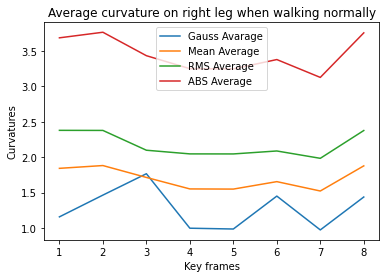

In [6]:
x = np.arange(1,9,1)
# plt.plot(x,result_gauss_center,label='Gauss Center')
# plt.plot(x,result_mean_center,label='Mean Center')
# plt.plot(x,result_rms_center,label='RMS Center')
# plt.plot(x,result_abs_center,label='ABS Center')


plt.plot(x,result_gauss_average,label='Gauss Avarage')
plt.plot(x,result_mean_average,label='Mean Average')
plt.plot(x,result_rms_average,label='RMS Average')
plt.plot(x,result_abs_average,label='ABS Average')

plt.title("Average curvature on right leg when walking normally")
plt.xlabel('Key frames')
plt.ylabel('Curvatures')
plt.legend()

plt.show()